# Imports for plotting

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

# Download data

In [2]:
from selectionfunctions.config import config
config['data_dir'] = '/Users/douglasboubert/Science/selectionfunctions/selectionfunctions/data/'

In [3]:
import selectionfunctions.cog_ii
selectionfunctions.cog_ii.fetch()

106.0 MiB of 106.0 MiB |   4.8 MiB/s |##################| 100% | ETA:  00:00:00

# Simple query

In [4]:
import selectionfunctions.cog_ii as CoGII
from selectionfunctions.source import Source

In [5]:
dr2_sf = CoGII.dr2_sf(version='modelAB',crowding=True)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 3.199 s
  auxilliary:   3.194 s
          sf:   0.002 s
interpolator:   0.003 s


In [6]:
coords = Source('12h30m25.3s', '15d15m58.1s', frame='icrs', photometry={'gaia_g':21.2})

prob_selection = dr2_sf(coords)

print('Probability of selection = {:.3f}%'.format(prob_selection*100.0))

Probability of selection = 15.158%


# Querying arrays of coordinates

In [7]:
l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])
g = np.array([20.8,21.0,21.2])

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(coords)

print(prob_selection)

[0.99907317 0.88894535 0.56533812]


In [8]:
l = np.linspace(0., 180., 12)
b = np.zeros(12)
g = 21.0*np.ones(12)
l.shape = (3, 4)
b.shape = (3, 4)
g.shape = (3, 4)

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(coords)

print(prob_selection)

[[0.57746354 0.50028986 0.52164311 0.85466996]
 [0.92477365 0.94327616 0.88105409 0.90771938]
 [0.99701694 0.93294062 0.80897816 0.45075536]]


# Maps

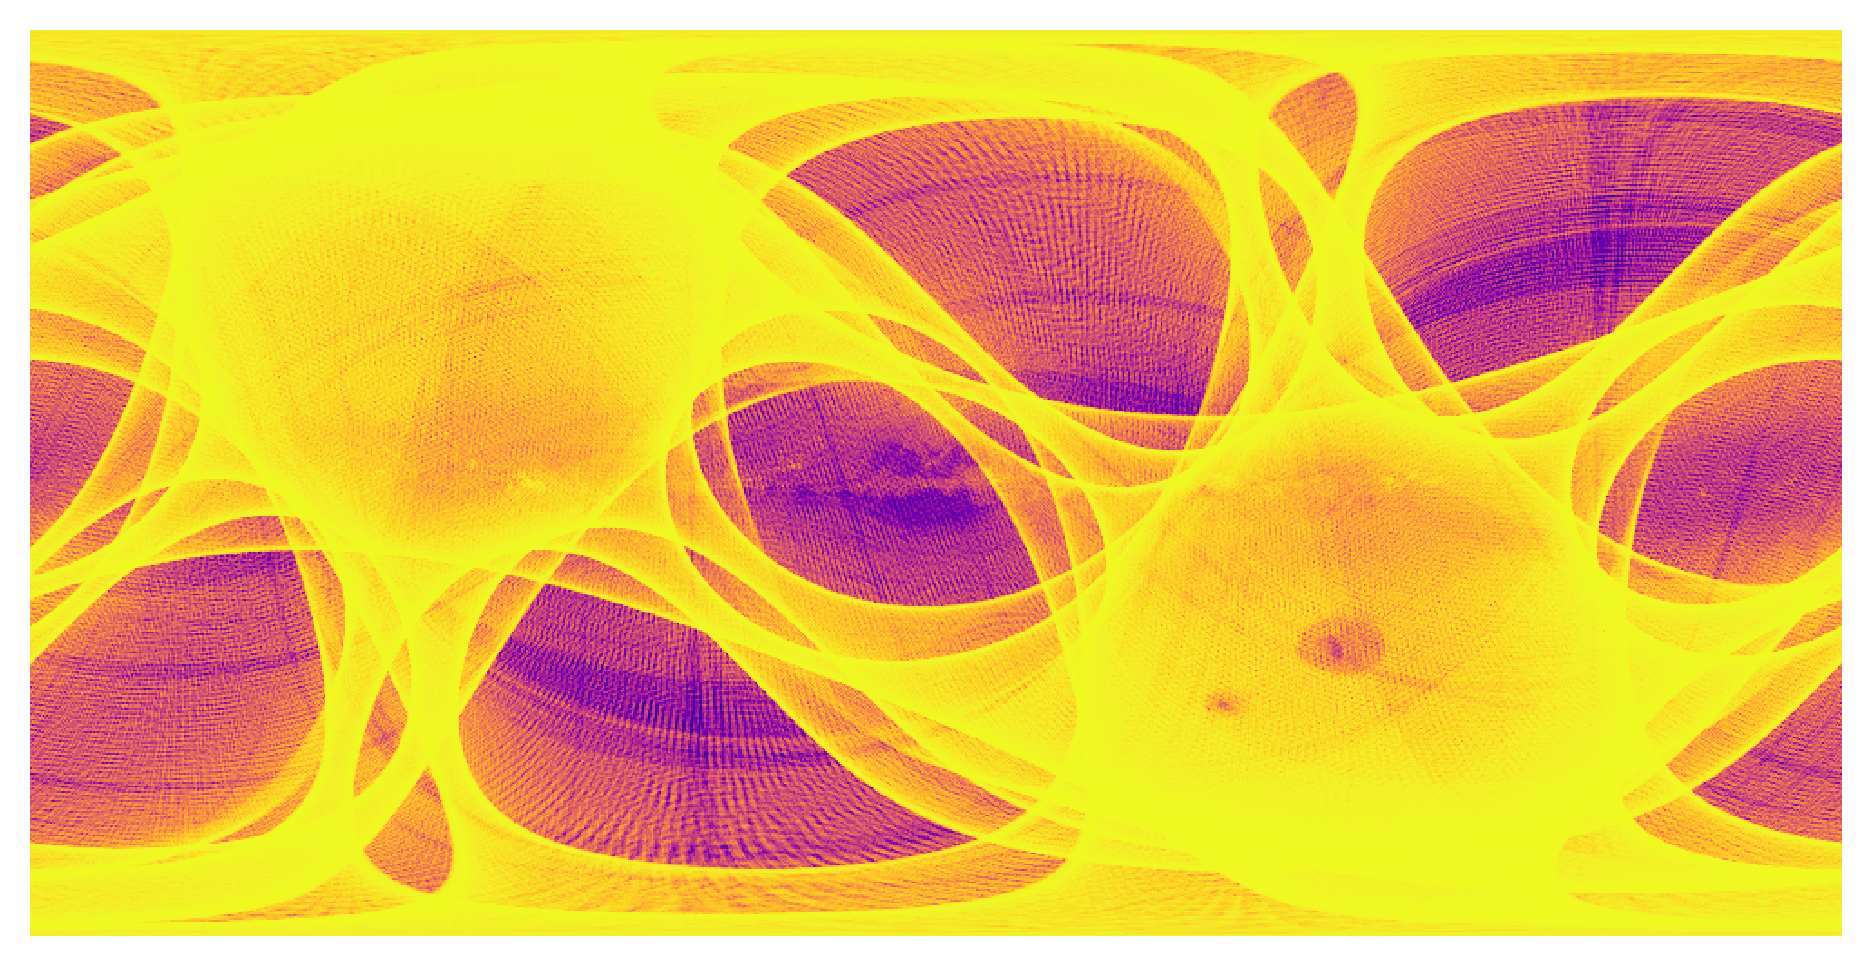

In [9]:
import astropy.units as units

l = np.linspace(-180.0, 180.0, 1000)
b = np.linspace(-90.0,90.0, 500)
l, b = np.meshgrid(l, b)
g = 21.0*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.axis('off')
plt.savefig('map.png', bbox_inches='tight', dpi=150)